In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# It allows to research a dependence between x and y
- intercept = (mean of y) - slope * (mean of x) - where line cross y axis
- slope = standard deviation of y devided by standard deviation of x and multiplied by correlation - angle over x axis

# Uses Least Squares Method
# It can be used if:
1. There is a Linear Dependence
2. Residuals are normally distributed
3. Residuals are always changed on each level of x

In [2]:
df = pd.read_csv("../data/states.csv")
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


# Linear Regression can help us to understand the dependence of y over x, let's reserch the dependence between poverty and level of education

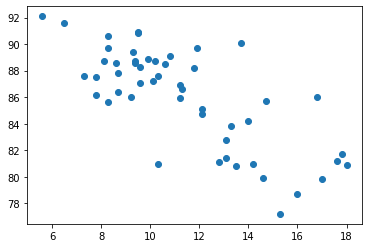

In [3]:
education = df['hs_grad']
poverty = df['poverty']
plt.scatter(poverty, education)

# Using scatter plot we can see that there is linear dependence and correlation is negative which stands for more bigger is poverty the less is level of edcation

# Create a Linear Regression Model to predict level of education based on poverty level

In [7]:
reg = LinearRegression().fit(np.array(poverty).reshape(-1, 1), education)
print(reg.coef_)
print(reg.intercept_)

[-0.89791088]
96.20217289942846


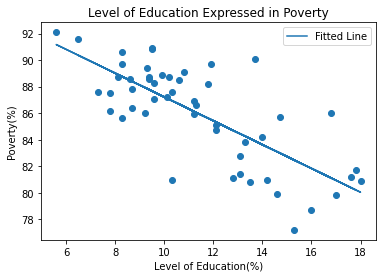

In [11]:
plt.scatter(poverty, education)
plt.plot(poverty, poverty*reg.coef_+reg.intercept_, label="Fitted Line")
plt.ylabel("Poverty(%)")
plt.title("Level of Education Expressed in Poverty")
plt.xlabel("Level of Education(%)")
plt.legend()

In [15]:
print(f"R-Squared = {reg.score(np.array(poverty).reshape(-1, 1), np.array(education).reshape(-1, 1))}")

R-Squared = 0.5577972503105935


# R-Squared = 0.5578 tells us that 55% of variance of y is explained by x
# Slope = - 0.89 tells us that by changing x by 1 our y will be decreased by -0.89

In [17]:
prediction = reg.predict(np.array(poverty).reshape(-1, 1))
residual = (education - prediction)

(array([1., 1., 0., 0., 0., 1., 4., 2., 1., 3., 2., 1., 0., 4., 5., 0., 9.,
        3., 4., 2., 0., 3., 2., 0., 0., 1., 1., 0., 0., 1.]),
 array([-5.95369083, -5.54859426, -5.14349769, -4.73840113, -4.33330456,
        -3.92820799, -3.52311143, -3.11801486, -2.71291829, -2.30782173,
        -1.90272516, -1.49762859, -1.09253203, -0.68743546, -0.2823389 ,
         0.12275767,  0.52785424,  0.9329508 ,  1.33804737,  1.74314394,
         2.1482405 ,  2.55333707,  2.95843364,  3.3635302 ,  3.76862677,
         4.17372334,  4.5788199 ,  4.98391647,  5.38901304,  5.7941096 ,
         6.19920617]),
 <BarContainer object of 30 artists>)

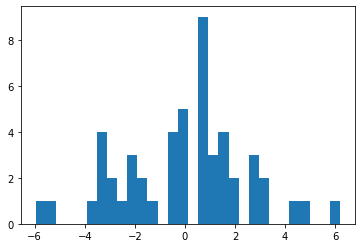

In [19]:
plt.hist(residual, bins=30)

# Our residuals are normally distributed which means that one of requirements are fulfilled